In [8]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [29]:
chess_data_filename = 'CSVs/chess_data_shaash.csv'
chess_data = pd.read_csv(chess_data_filename, index_col='Date')

In [10]:
chess_data.columns

Index(['Player', 'Player Rating', 'Player Nationality', 'Player Side',
       'Player Result', 'Player First Move', 'Opponent', 'Opponent Rating',
       'Opponent Nationality', 'Opponent Side', 'Opponent Result',
       'Opponent First Move', 'Opening', 'Variation', 'Termination', 'Moves',
       'Event', 'Time Class', 'Time Control', 'FEN'],
      dtype='object')

In [11]:
chess_data['Event'].unique()

array(['Live Chess', "Let's Play!", 'Live Chess - King of the Hill',
       'Live Chess - Crazyhouse', 'Live Chess - Three-Check',
       'Live Chess - Chess960', 'Chess Learners Brawl #21 - Round 1',
       'U-1450 - Board 16'], dtype=object)

In [12]:
chess_data['Opening'].unique()

array(['https://www.chess.com/openings/Philidor-Defense-3.Bc4',
       'https://www.chess.com/openings/Sicilian-Defense-Open-Variation',
       'https://www.chess.com/openings/Italian-Game-Anti-Fried-Liver-Defense',
       ...,
       'https://www.chess.com/openings/French-Defense-Classical-Variation',
       'https://www.chess.com/openings/Sicilian-Defense-Open-Najdorf-Main-Line-10.Bd3-h6',
       'https://www.chess.com/openings/Slav-Defense-Modern-Line-3...Nf6-4.g3-Bf5-5.Bg2'],
      dtype=object)

In [20]:
chess_data['Variation'].unique()

array(['Defense 3.Bc4', 'Defense Open Variation',
       'Game Anti Fried Liver Defense', ...,
       'Defense Exchange Symmetrical Line...9.Qxd3 Bd6 10.Bxd6 Qxd6',
       'Defense Open Najdorf Main Line 10.Bd3 h6',
       'Defense Modern Line 3...Nf6 4.g3 Bf5 5.Bg2'], dtype=object)

In [22]:
chess_data['Time Class'].unique()

array(['1800', '600', '180', '1/259200', '60', '600+10', '900+10',
       '120+1', '2700+45', '300', '3600', '900', '480+12', '900+1',
       '900+5', '1200+15', '1800+30', '1800+20', '1200', '5100', '180+2',
       '1380', '1800+10', '2100', '900+2', '1/86400', '1080', '1320',
       '240+20', '1320+45', '600+20', '300+2', '600+3', '240', '1500+10',
       '420+15', '720+12', '60+1', '300+3', '720+3', '300+5', '600+1',
       '480', '120+12', '10', '30', '60+10', '1260', '600+5', '600+7',
       '420+7', '360', '60+7', '360+6', '420', '120', '900+15', '480+10',
       '60+8', '600+15', '900+30', '60+5', '1500+5', '45+5', '600+2',
       '1500+3', '180+1', '480+2', '2700+15', '300+1', '3600+5'],
      dtype=object)

In [21]:
chess_data['FEN'].unique()

array(['3kr3/5r2/1b6/4q3/6P1/3P1P2/6KP/8 w - -',
       '4k1Q1/R6P/8/8/8/2B5/6K1/8 b - -',
       'r1bqkbr1/pppp1p2/5n1p/4p3/2B1P3/8/PPnP1PPP/RNB1R1K1 w q -', ...,
       'r3r1k1/5p1N/4pPpQ/3p1b1p/p2P4/7P/pq3PP1/R3R1K1 b - -',
       '8/4kp1p/8/5pPP/2b1p3/P1P5/4q3/1RK5 w - -',
       'B1bqr1k1/p4ppp/1p2pn2/2p1N3/1BpP4/6P1/PP2PP1P/RN1QK2R w KQ c6'],
      dtype=object)

Text(0, 0.5, 'Date')

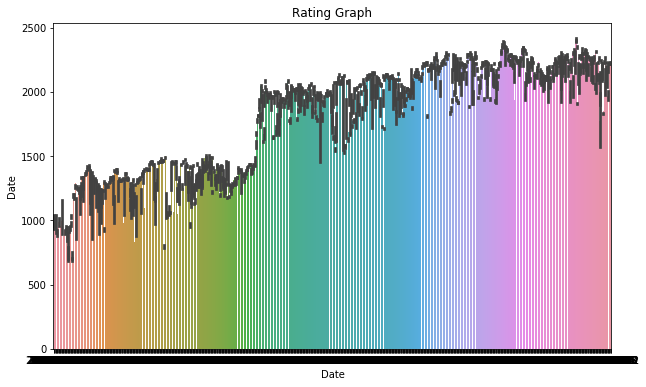

In [23]:
plt.figure(figsize=(10,6))
plt.title("Rating Graph")
sns.barplot(x=chess_data.index, y=chess_data['Player Rating'])
plt.ylabel("Date")

In [24]:
chess_data['Player Result'].unique()

array(['Resigned', 'Checkmated', 'Draw agreed', 'Win', 'Timeout',
       'Abandoned', 'Stalemate', 'Draw by repetition',
       'Insufficient material', 'Draw by 50-move rule',
       'Opponent King reached the hill', 'Checked for the 3rd time',
       'Draw by timeout vs insufficient material'], dtype=object)

In [25]:
total_games = chess_data.shape[0]
num_wins = chess_data[chess_data['Player Result'] == 'Win'].shape[0]
num_losses = chess_data[chess_data['Opponent Result'] == 'Win'].shape[0]
draws = chess_data[chess_data['Player Result'].str.contains('Draw')].shape[0]
insufficient_material = chess_data[chess_data['Player Result'] == 'Insufficient material'].shape[0]
stalemates = chess_data[chess_data['Player Result'] == 'Stalemate'].shape[0]
num_draws = draws + insufficient_material + stalemates
frequency_data_dict = {'total_games': total_games, 'num_wins': num_wins, 'num_losses': num_losses, 'num_draws': num_draws}
frequency_data_df = pd.DataFrame.from_records([frequency_data_dict], index='total_games')
frequency_data_df

,num_wins,num_losses,num_draws
total_games,,,
15919,7218,8061,640


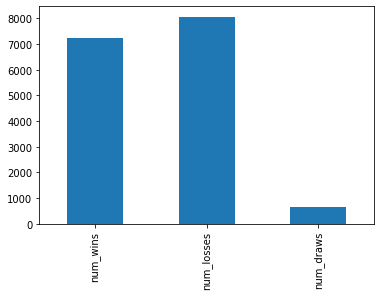

In [26]:
frequency_data_df.iloc[0].plot.bar()

In [27]:
chess_data['Time Control'].unique()

array(['rapid', 'blitz', 'daily', 'bullet'], dtype=object)

In [30]:
chess_data['Tournament'].unique()

array(['None',
       'https://www.chess.com/tournament/live/30-super-blitz-332284',
       'https://www.chess.com/tournament/live/100-rapid-336496',
       'https://www.chess.com/tournament/live/30-super-blitz-598930',
       'https://www.chess.com/tournament/live/50-blitz-599018',
       'https://www.chess.com/tournament/live/10-lightning-612666',
       'https://www.chess.com/tournament/live/30-super-blitz-612678',
       'https://www.chess.com/tournament/live/10-lightning-623006',
       'https://www.chess.com/tournament/live/10-bullet-688004',
       'https://www.chess.com/tournament/live/10-bullet-690295',
       'https://www.chess.com/tournament/live/21-bullet-690303',
       'https://www.chess.com/tournament/live/21-bullet-691348',
       'https://www.chess.com/tournament/live/10-king-of-the-hill-694369',
       'https://www.chess.com/tournament/live/100-blitz-694372',
       'https://www.chess.com/tournament/live/21-bullet-737897',
       'https://www.chess.com/tournament/live